# Algae Bloom Data Investigation
https://msoese.atlassian.net/browse/WABS-23

In [12]:
# Import libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

In [33]:
df = pd.read_csv("../../data/cleaned/site1_malin.csv")
df.describe()

,Temp C,Depth [m],Chlorophyll (ug/L),BGA-Phycocyanin [µg/l],Turbidity (NTU),pH,ODOSat%,Sp Cond (uS/cm)
count,88.000000,88.000000,88.000000,88.000000,88.000000,88.000000,88.000000,88.000000
mean,18.984091,1.625000,21.570455,18.002273,10.880682,8.208409,75.786364,731.897727
std,3.666308,0.965646,13.852890,14.430117,8.491495,0.322490,28.310825,19.601220
min,9.700000,0.500000,6.000000,0.900000,4.100000,7.510000,2.400000,695.000000
25%,17.900000,0.875000,11.800000,7.850000,5.800000,7.957500,69.975000,715.000000
50%,20.300000,1.500000,16.500000,14.400000,8.000000,8.150000,77.800000,728.000000
75%,21.025000,2.250000,26.625000,24.725000,11.500000,8.515000,89.300000,747.000000
max,24.500000,3.000000,65.800000,62.300000,48.300000,9.010000,134.700000,786.000000


## Create a new synthetic column to help identify algae bloom

In [34]:
df["bloom"] = df["BGA-Phycocyanin [µg/l]"].apply(lambda x: True if x > 7.5 else False)
df["bloom"] = df["bloom"].astype('bool')

In [36]:
df.shape
df.head()

,Date (mm.dd.yyyy),Temp C,Depth [m],Chlorophyll (ug/L),BGA-Phycocyanin [µg/l],Turbidity (NTU),pH,ODOSat%,Sp Cond (uS/cm),bloom
0,6/1/2016,20.8,0.5,51.7,3.7,4.8,8.65,127.0,748,False
1,6/1/2016,20.4,1.0,42.6,3.0,4.9,8.66,131.4,756,False
2,6/1/2016,18.0,2.0,37.1,3.9,5.0,8.25,85.4,775,False
3,6/1/2016,15.8,3.0,48.8,5.8,5.8,7.89,4.0,786,False
4,6/8/2016,22.5,0.5,6.0,0.9,4.3,8.18,77.0,763,False


### Lets see what this data is showing us!

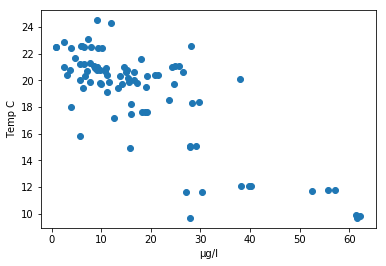

In [48]:
# Checkign Temperature for BGA
plt.scatter(df['BGA-Phycocyanin [µg/l]'], df['Temp C'])
plt.xlabel("µg/l")
plt.ylabel("Temp C")
plt.show()

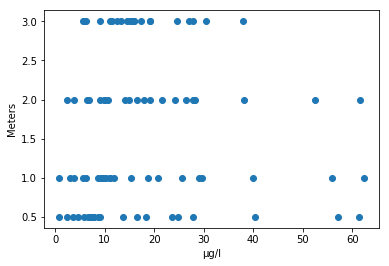

In [50]:
# Checking depth for BGA
plt.scatter(df['BGA-Phycocyanin [µg/l]'], df['Depth [m]'])
plt.xlabel("µg/l")
plt.ylabel("Meters")
plt.show()

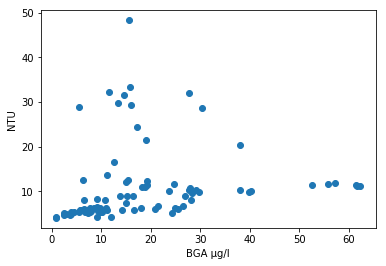

In [52]:
# Checking coorilation between Turbidity and BGA
plt.scatter(df['BGA-Phycocyanin [µg/l]'], df['Turbidity (NTU)'])
plt.xlabel("BGA µg/l")
plt.ylabel("NTU")
plt.show()

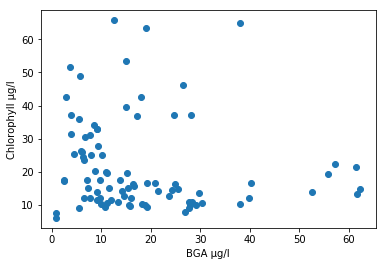

In [53]:
# Checking coorilation between NHA (nonharmful algae) for BGA
plt.scatter(df['BGA-Phycocyanin [µg/l]'], df['Chlorophyll (ug/L)'])
plt.xlabel("BGA µg/l")
plt.ylabel("Chlorophyll µg/l")
plt.show()

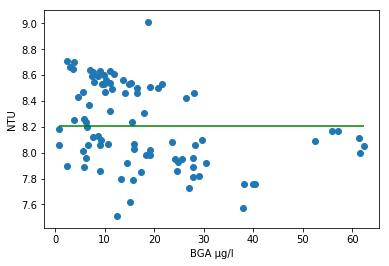

In [61]:
# Checking coorilation between Turbidity and BGA
plt.scatter(df['BGA-Phycocyanin [µg/l]'], df['pH'])
plt.hlines(xmin=df['BGA-Phycocyanin [µg/l]'].min(), xmax=df['BGA-Phycocyanin [µg/l]'].max(), y=df['pH'].mean(),colors='g')
plt.xlabel("BGA µg/l")
plt.ylabel("NTU")
plt.show()

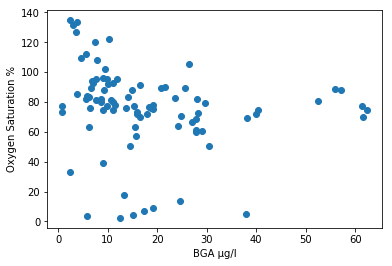

In [62]:
plt.scatter(df['BGA-Phycocyanin [µg/l]'], df['ODOSat%'])
plt.xlabel("BGA µg/l")
plt.ylabel("Oxygen Saturation %")
plt.show()


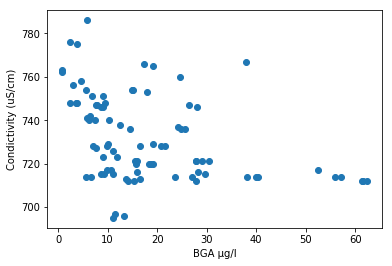

In [64]:
plt.scatter(df['BGA-Phycocyanin [µg/l]'], df['Sp Cond (uS/cm)'])
plt.xlabel("BGA µg/l")
plt.ylabel("Condictivity (uS/cm)")
plt.show()

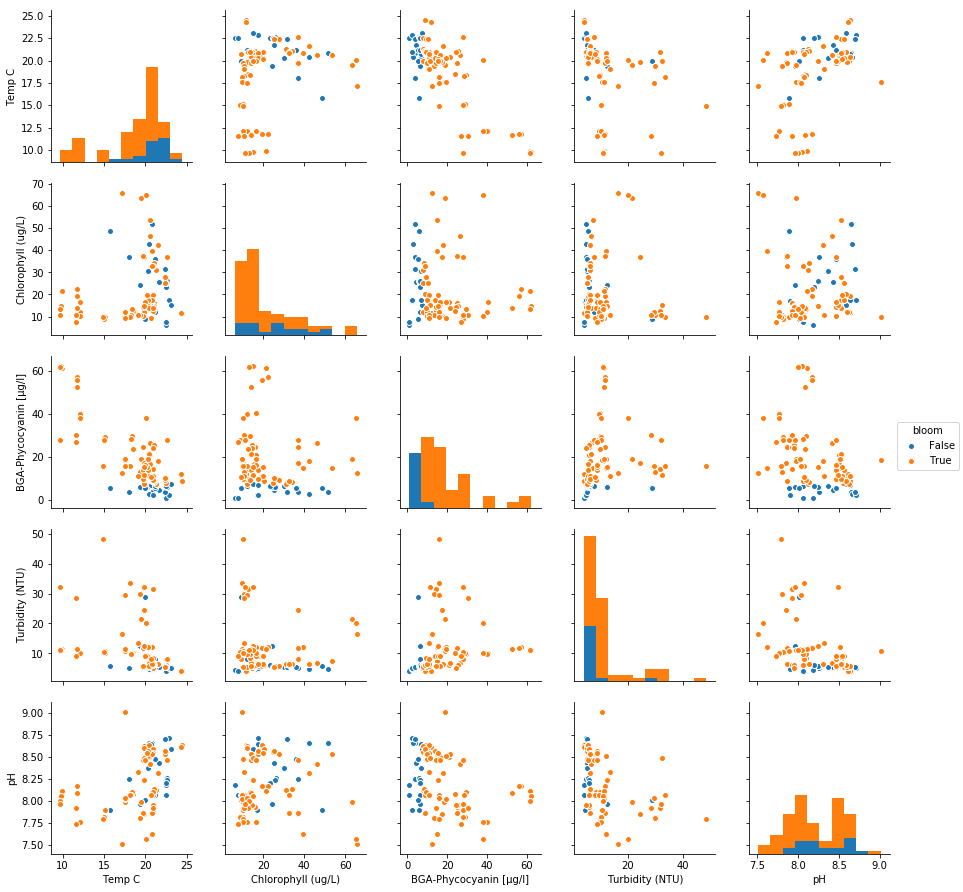

In [71]:
#	Depth [m]	Chlorophyll (ug/L)	BGA-Phycocyanin [µg/l]	Turbidity (NTU)	pH	ODOSat%	Sp Cond (uS/cm)	bloom
temp_data = df.drop(columns=['Date (mm.dd.yyyy)','Depth [m]','bloom','ODOSat%','Sp Cond (uS/cm)'])
sns.pairplot(data=df, hue='bloom', vars=temp_data.columns)